In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Data\CarPrice_Assignment.csv")

In [3]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

### No Null values.

In [5]:
data_description = pd.read_excel('Data\Data Dictionary - carprices.xlsx')

In [6]:
data_description=data_description.iloc[3:29,[7,11]]
data_description.columns=['var','desc']

In [7]:
pd.set_option('display.max_colwidth', -1)
data_description

,var,desc
3,Car_ID,Unique id of each observation (Interger)
4,Symboling,"Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical)"
5,carCompany,Name of car company (Categorical)
6,fueltype,Car fuel type i.e gas or diesel (Categorical)
7,aspiration,Aspiration used in a car (Categorical)
8,doornumber,Number of doors in a car (Categorical)
9,carbody,body of car (Categorical)
10,drivewheel,type of drive wheel (Categorical)
11,enginelocation,Location of car engine (Categorical)
12,wheelbase,Weelbase of car (Numeric)


In [8]:
data_description['var']=data_description['var'].apply(lambda x:x.strip().lower())

### Checking categorical varaibles and checking if they are perfectly described or not. they shoul be type object and look any data inconsistency

In [9]:
data[['car_ID']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 1 columns):
car_ID    205 non-null int64
dtypes: int64(1)
memory usage: 1.7 KB


In [10]:
data['car_ID'].value_counts().describe()

count    205.0
mean     1.0  
std      0.0  
min      1.0  
25%      1.0  
50%      1.0  
75%      1.0  
max      1.0  
Name: car_ID, dtype: float64

### carID I will drop as there are 205 differt each with only onc example.

In [11]:
data=data.iloc[:,1:]

In [12]:
data[['symboling']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 1 columns):
symboling    205 non-null int64
dtypes: int64(1)
memory usage: 1.7 KB


### symboling need to be changed to category

In [13]:
data[['symboling']]=data[['symboling']].astype('category')

In [14]:
data['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2    3 
Name: symboling, dtype: int64

In [15]:
data_description=data_description.reset_index()

In [16]:
data_description[data_description['var'] == 'symboling']

,index,var,desc
1,4,symboling,"Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical)"


In [17]:
## value associated with -2 very less and no -3

In [18]:
data['CarName'].value_counts()

peugeot 504                  6
toyota corona                6
toyota corolla               6
subaru dl                    4
mitsubishi g4                3
toyota mark ii               3
honda civic                  3
mazda 626                    3
mitsubishi mirage g4         3
mitsubishi outlander         3
honda accord                 2
saab 99gle                   2
volvo 145e (sw)              2
subaru                       2
saab 99le                    2
toyota corolla 1200          2
honda civic cvcc             2
audi 100ls                   2
plymouth fury iii            2
volkswagen dasher            2
bmw 320i                     2
mazda glc deluxe             2
mazda rx-4                   2
saab 99e                     2
nissan rogue                 2
volvo 244dl                  2
peugeot 604sl                2
mazda glc                    2
volvo 144ea                  2
bmw x3                       2
                            ..
toyota celica gt liftback    1
renault 

### This vaiable will not have good impact on regression as number of categories is very high but obs within category is very low

### Parked for EDA: will brand name is good?

In [19]:
data['fueltype'].value_counts()

gas       185
diesel    20 
Name: fueltype, dtype: int64

In [20]:
data['fueltype'].value_counts()

gas       185
diesel    20 
Name: fueltype, dtype: int64

### very low claues for diesel. 

In [21]:
data_description[data_description['var']=='aspiration']

,index,var,desc
4,7,aspiration,Aspiration used in a car (Categorical)


In [22]:
data['aspiration'].value_counts()

std      168
turbo    37 
Name: aspiration, dtype: int64

std works on atmospheric pressure where as turbo A turbocharger, colloquially known as a turbo, is a turbine-driven, forced induction device that increases an internal combustion engine's efficiency and power output by forcing extra compressed air into the combustion chamber

In [23]:
data['doornumber'].value_counts()

four    115
two     90 
Name: doornumber, dtype: int64

In [24]:
data['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop        8 
convertible    6 
Name: carbody, dtype: int64

In [25]:
data['drivewheel'].value_counts()

fwd    120
rwd    76 
4wd    9  
Name: drivewheel, dtype: int64

In [26]:
data['enginelocation'].value_counts()

front    202
rear     3  
Name: enginelocation, dtype: int64

In [27]:
data['drivewheel'].value_counts()

fwd    120
rwd    76 
4wd    9  
Name: drivewheel, dtype: int64

### some categories have  very low values

In [28]:
data[['wheelbase']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 1 columns):
wheelbase    205 non-null float64
dtypes: float64(1)
memory usage: 1.7 KB


In [29]:
data[['carheight']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 1 columns):
carheight    205 non-null float64
dtypes: float64(1)
memory usage: 1.7 KB


In [30]:
data[['carwidth']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 1 columns):
carwidth    205 non-null float64
dtypes: float64(1)
memory usage: 1.7 KB


In [31]:
data[['curbweight']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 1 columns):
curbweight    205 non-null int64
dtypes: int64(1)
memory usage: 1.7 KB


In [32]:
data_description['var'].unique()

array(['car_id', 'symboling', 'carcompany', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price(dependent variable)'], dtype=object)

In [33]:
data[['enginetype']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 1 columns):
enginetype    205 non-null object
dtypes: object(1)
memory usage: 1.7+ KB


In [34]:
data['enginetype'].value_counts()

ohc      148
ohcf     15 
ohcv     13 
l        12 
dohc     12 
rotor    4  
dohcv    1  
Name: enginetype, dtype: int64

### rotor and dohcv have very low numbers

In [35]:
data[['cylindernumber']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 1 columns):
cylindernumber    205 non-null object
dtypes: object(1)
memory usage: 1.7+ KB


In [36]:
data['cylindernumber'].value_counts()

four      159
six       24 
five      11 
eight     5  
two       4  
twelve    1  
three     1  
Name: cylindernumber, dtype: int64

In [37]:
data[['enginesize']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 1 columns):
enginesize    205 non-null int64
dtypes: int64(1)
memory usage: 1.7 KB


In [38]:
data[['fuelsystem']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 1 columns):
fuelsystem    205 non-null object
dtypes: object(1)
memory usage: 1.7+ KB


In [39]:
data['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi    9 
4bbl    3 
mfi     1 
spfi    1 
Name: fuelsystem, dtype: int64

In [40]:
data.iloc[:,17:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 8 columns):
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
price               205 non-null float64
dtypes: float64(4), int64(4)
memory usage: 12.9 KB


In [41]:
data_numeric=data.select_dtypes(include=[np.number])

In [42]:
data_cat=data.select_dtypes(exclude=[np.number])

In [43]:
data_numeric.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


### Analyzing Numerical Varaiables using unvariate plots. checking distribution and looking for outliers.

In [44]:
import seaborn as sns

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

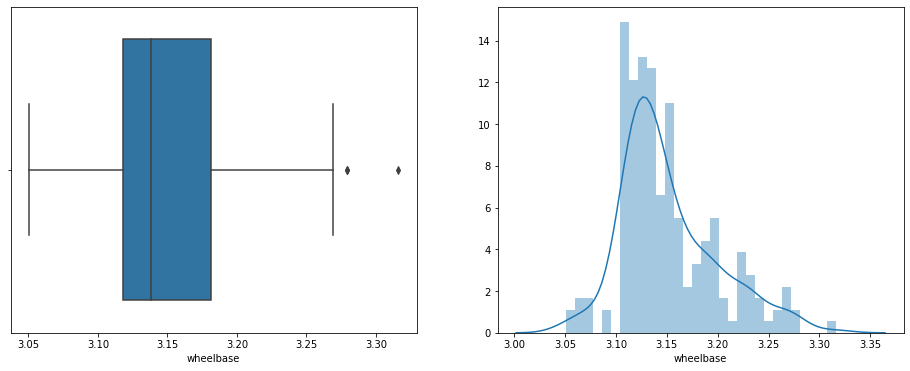

In [46]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(np.power(data_numeric['wheelbase'],1/4),ax=ax[0])
sns.distplot(np.power(data_numeric['wheelbase'],1/4),bins=30,ax=ax[1])

plt.show()

In [47]:
data_cat[data['wheelbase']>114]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
70,-1,buick skyhawk,diesel,turbo,four,sedan,rwd,front,ohc,five,idi
71,-1,buick opel isuzu deluxe,gas,std,four,sedan,rwd,front,ohcv,eight,mpfi
73,0,buick century special,gas,std,four,sedan,rwd,front,ohcv,eight,mpfi
109,0,peugeot 504 (sw),gas,std,four,wagon,rwd,front,l,four,mpfi
110,0,peugeot 504,diesel,turbo,four,wagon,rwd,front,l,four,idi
113,0,peugeot 504,gas,std,four,wagon,rwd,front,l,four,mpfi
114,0,peugeot 505s turbo diesel,diesel,turbo,four,wagon,rwd,front,l,four,idi


### nothing spcl about outliers here. Though lets extract company names

In [48]:
data['brandName']=data['CarName'].apply(lambda x:x.split(' ')[0].lower().strip())

In [49]:
data['brandName'].value_counts()

toyota         31
nissan         18
mazda          15
honda          13
mitsubishi     13
subaru         12
volvo          11
peugeot        11
volkswagen     9 
dodge          9 
buick          8 
bmw            8 
plymouth       7 
audi           7 
saab           6 
porsche        4 
isuzu          4 
jaguar         3 
chevrolet      3 
alfa-romero    3 
maxda          2 
vw             2 
renault        2 
toyouta        1 
porcshce       1 
vokswagen      1 
mercury        1 
Name: brandName, dtype: int64

In [50]:
data.loc[(data['brandName']=='vw' )| (data['brandName']=='vokswagen')|(data['brandName']=='porcshce')|(data['brandName']=='porsche'),'brandName']='volkswagen'

In [51]:
data.loc[(data['brandName']=='toyouta' ),'brandName']='toyota'
 

In [52]:
data['brandName'].value_counts()

toyota         32
nissan         18
volkswagen     17
mazda          15
mitsubishi     13
honda          13
subaru         12
peugeot        11
volvo          11
dodge          9 
buick          8 
bmw            8 
audi           7 
plymouth       7 
saab           6 
isuzu          4 
jaguar         3 
alfa-romero    3 
chevrolet      3 
renault        2 
maxda          2 
mercury        1 
Name: brandName, dtype: int64

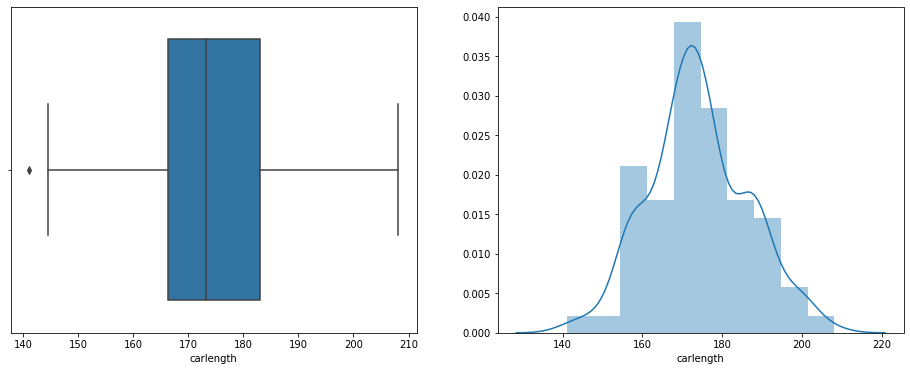

In [53]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric['carlength'],ax=ax[0])
sns.distplot(data_numeric['carlength'],bins=10,ax=ax[1])

plt.show()

In [54]:
data_cat[data['carlength']<143]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
18,2,chevrolet impala,gas,std,two,hatchback,fwd,front,l,three,2bbl


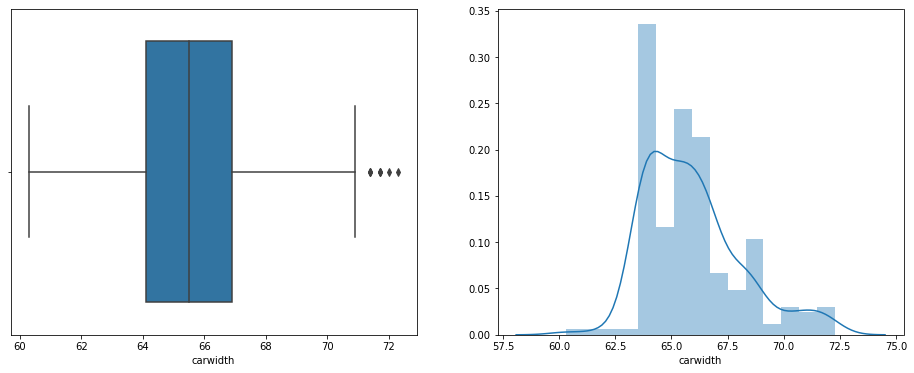

In [55]:

fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric['carwidth'],ax=ax[0])
sns.distplot(data_numeric['carwidth'],bins=15,ax=ax[1])

plt.show()

In [56]:
data_cat[data['carwidth']>71]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
6,1,audi 100ls,gas,std,four,sedan,fwd,front,ohc,five,mpfi
7,1,audi 5000,gas,std,four,wagon,fwd,front,ohc,five,mpfi
8,1,audi 4000,gas,turbo,four,sedan,fwd,front,ohc,five,mpfi
70,-1,buick skyhawk,diesel,turbo,four,sedan,rwd,front,ohc,five,idi
71,-1,buick opel isuzu deluxe,gas,std,four,sedan,rwd,front,ohcv,eight,mpfi
73,0,buick century special,gas,std,four,sedan,rwd,front,ohcv,eight,mpfi
74,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,ohcv,eight,mpfi
129,1,porsche cayenne,gas,std,two,hatchback,rwd,front,dohcv,eight,mpfi


### Luxury Brand are outliers above?

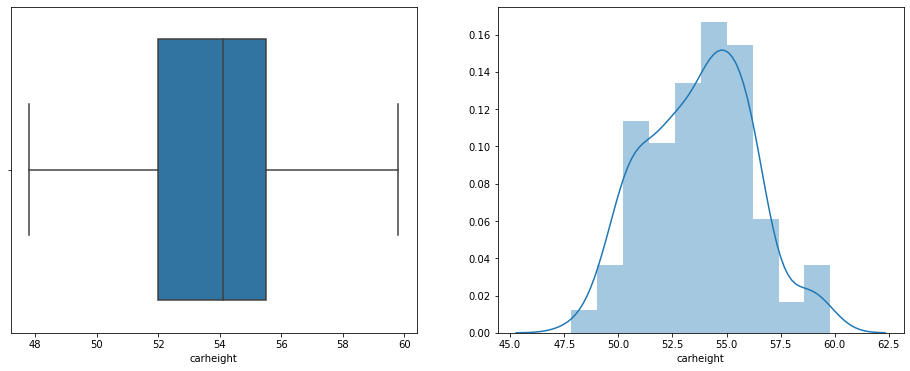

In [57]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric['carheight'],ax=ax[0])
sns.distplot(data_numeric['carheight'],bins=10,ax=ax[1])

plt.show()

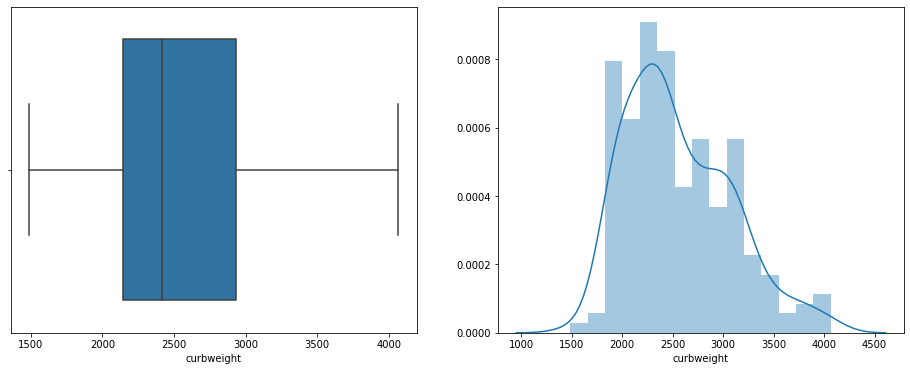

In [58]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric['curbweight'],ax=ax[0])
sns.distplot(data_numeric['curbweight'],bins=15,ax=ax[1])

plt.show()

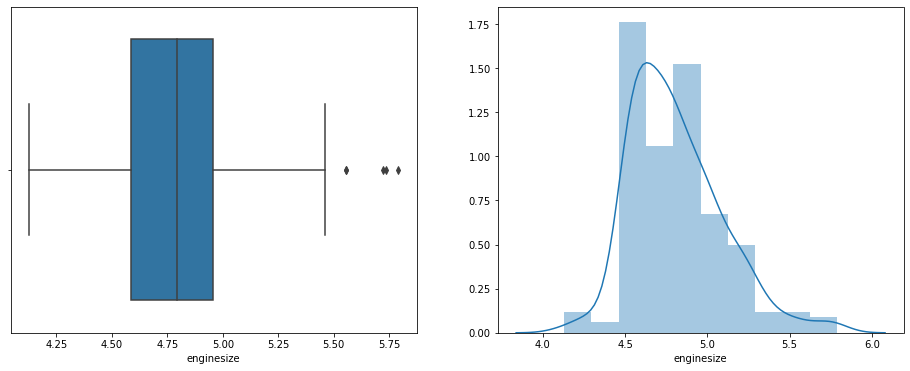

In [59]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(np.log(data_numeric['enginesize']+1),ax=ax[0])
sns.distplot(np.log(data_numeric['enginesize']+1),bins=10,ax=ax[1])

plt.show()

### This feature is more skewed then others. Might need transfrmation in later stages

### outliers seems to be from luxury brands

In [60]:
data[data_numeric['enginesize']>200].sort_values('enginesize')

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brandName
129,1,porsche cayenne,gas,std,two,hatchback,rwd,front,98.4,175.7,...,mpfi,3.94,3.11,10.0,288,5750,17,28,31400.5,volkswagen
15,0,bmw x4,gas,std,four,sedan,rwd,front,103.5,189.0,...,mpfi,3.62,3.39,8.0,182,5400,16,22,30760.0,bmw
16,0,bmw x5,gas,std,two,sedan,rwd,front,103.5,193.8,...,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0,bmw
17,0,bmw x3,gas,std,four,sedan,rwd,front,110.0,197.0,...,mpfi,3.62,3.39,8.0,182,5400,15,20,36880.0,bmw
71,-1,buick opel isuzu deluxe,gas,std,four,sedan,rwd,front,115.6,202.6,...,mpfi,3.46,3.10,8.3,155,4750,16,18,34184.0,buick
72,3,buick skylark,gas,std,two,convertible,rwd,front,96.6,180.3,...,mpfi,3.46,3.10,8.3,155,4750,16,18,35056.0,buick
47,0,jaguar xj,gas,std,four,sedan,rwd,front,113.0,199.6,...,mpfi,3.63,4.17,8.1,176,4750,15,19,32250.0,jaguar
48,0,jaguar xf,gas,std,four,sedan,rwd,front,113.0,199.6,...,mpfi,3.63,4.17,8.1,176,4750,15,19,35550.0,jaguar
74,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,112.0,199.2,...,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0,buick
73,0,buick century special,gas,std,four,sedan,rwd,front,120.9,208.1,...,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0,buick


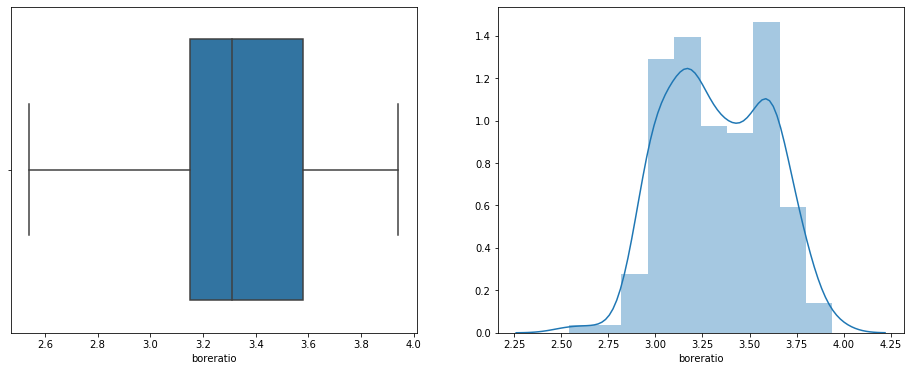

In [61]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric['boreratio'],ax=ax[0])
sns.distplot(data_numeric['boreratio'],bins=10,ax=ax[1])

plt.show()

### looks bimodal. check with categorical variables?. will check at bottom of this file

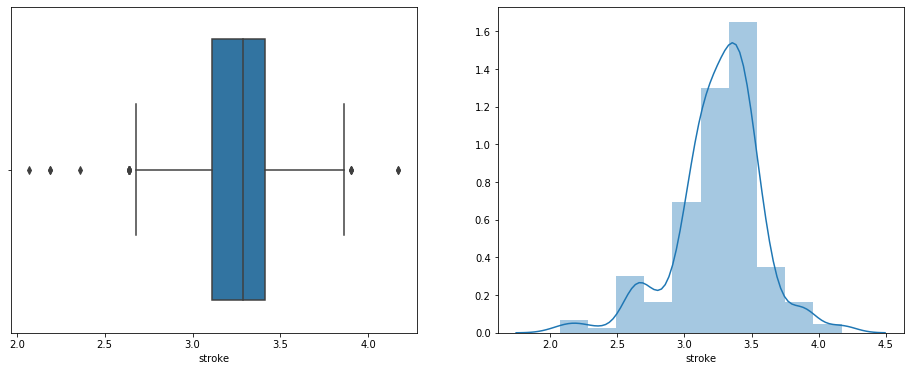

In [62]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric['stroke'],ax=ax[0])
sns.distplot(data_numeric['stroke'],bins=10,ax=ax[1])

plt.show()

In [63]:
data_cat[data_numeric['stroke']>3.9]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
47,0,jaguar xj,gas,std,four,sedan,rwd,front,dohc,six,mpfi
48,0,jaguar xf,gas,std,four,sedan,rwd,front,dohc,six,mpfi


In [64]:
data_numeric['stroke'].describe()["25%"]+1.5*(data_numeric['stroke'].describe()["25%"]-data_numeric['stroke'].describe()["75%"])

2.6599999999999993

In [89]:
pd.set_option('display.max_columns',100)

In [90]:
data[data_numeric['stroke']<2.60].sort_values('stroke')

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brandName
134,3,saab 99le,gas,std,two,hatchback,fwd,front,99.1,186.6,66.5,56.1,2707,ohc,four,121,mpfi,2.54,2.07,9.3,110,5250,21,28,15040.0,saab
111,0,peugeot 504,gas,std,four,sedan,rwd,front,107.9,186.7,68.4,56.7,3075,l,four,120,mpfi,3.46,2.19,8.4,95,5000,19,24,15580.0,peugeot
113,0,peugeot 504,gas,std,four,wagon,rwd,front,114.2,198.9,68.4,56.7,3285,l,four,120,mpfi,3.46,2.19,8.4,95,5000,19,24,16695.0,peugeot
138,2,subaru,gas,std,two,hatchback,fwd,front,93.7,156.9,63.4,53.7,2050,ohcf,four,97,2bbl,3.62,2.36,9.0,69,4900,31,36,5118.0,subaru


### outliers at both end. we will ke an eye for this later stages

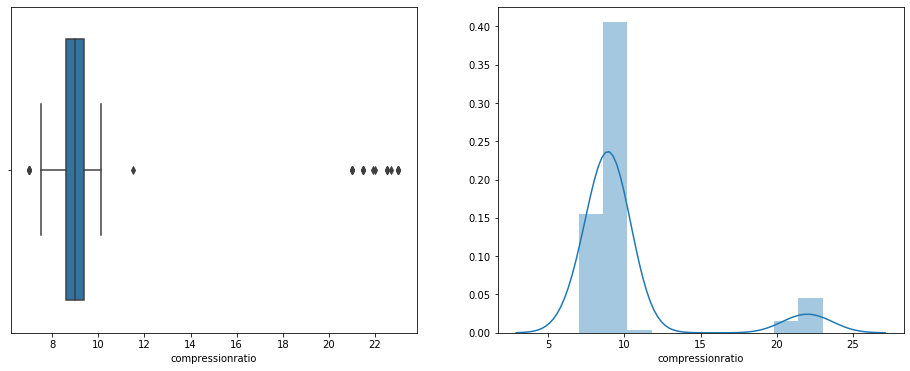

In [66]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric['compressionratio'],ax=ax[0])
sns.distplot(data_numeric['compressionratio'],bins=10,ax=ax[1])

plt.show()

### bimodal beacuse of fuletype

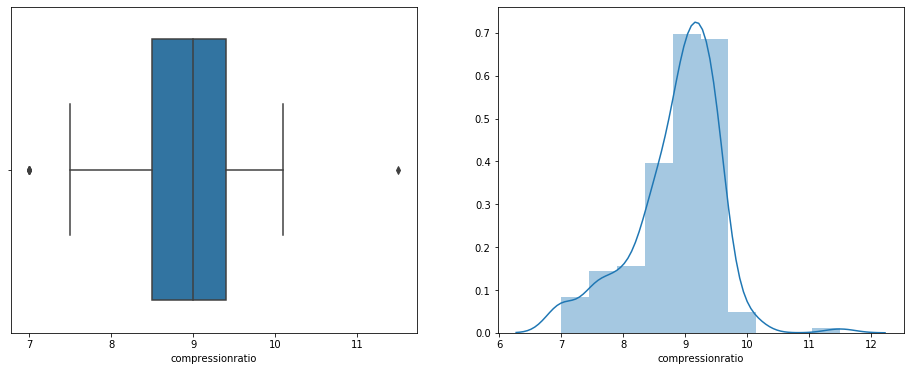

In [67]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric.loc[data['fueltype']=='gas','compressionratio'],ax=ax[0])
sns.distplot(data_numeric.loc[data['fueltype']=='gas','compressionratio'],bins=10,ax=ax[1])

plt.show()

In [68]:
data[(data['fueltype']=='gas')&(data['compressionratio']>11)]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brandName
49,0,jaguar xk,gas,std,two,sedan,rwd,front,102.0,191.7,...,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0,jaguar


In [69]:
data[(data['fueltype']=='gas')&(data['compressionratio']<=7)]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brandName
9,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,...,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167,audi
29,3,dodge coronet custom (sw),gas,turbo,two,hatchback,fwd,front,95.9,173.2,...,mfi,3.60,3.90,7.0,145,5000,19,24,12964.000,dodge
82,3,mitsubishi outlander,gas,turbo,two,hatchback,fwd,front,95.9,173.2,...,spdi,3.58,3.86,7.0,145,5000,19,24,12629.000,mitsubishi
83,3,mitsubishi g4,gas,turbo,two,hatchback,fwd,front,95.9,173.2,...,spdi,3.59,3.86,7.0,145,5000,19,24,14869.000,mitsubishi
84,3,mitsubishi mirage g4,gas,turbo,two,hatchback,fwd,front,95.9,173.2,...,spdi,3.59,3.86,7.0,145,5000,19,24,14489.000,mitsubishi
117,0,peugeot 604sl,gas,turbo,four,sedan,rwd,front,108.0,186.7,...,mpfi,3.61,3.21,7.0,142,5600,18,24,18150.000,peugeot
124,3,plymouth duster,gas,turbo,two,hatchback,rwd,front,95.9,173.2,...,spdi,3.59,3.86,7.0,145,5000,19,24,12764.000,plymouth


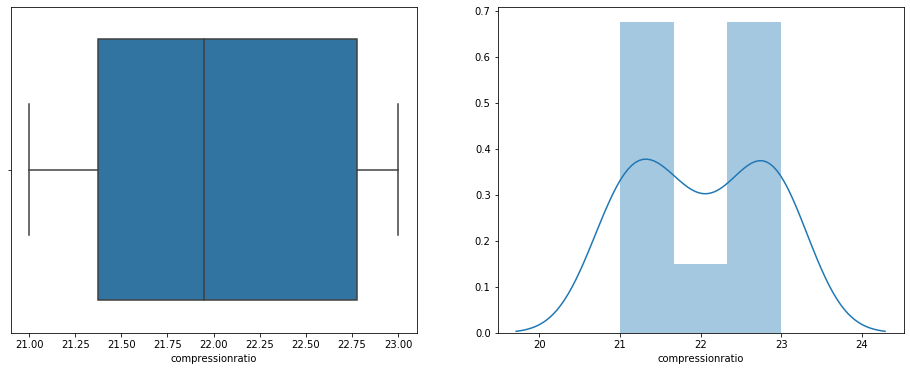

In [70]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric.loc[data['fueltype']=='diesel','compressionratio'],ax=ax[0])
sns.distplot(data_numeric.loc[data['fueltype']=='diesel','compressionratio'],bins=3,ax=ax[1])

plt.show()

In [71]:
data_numeric.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

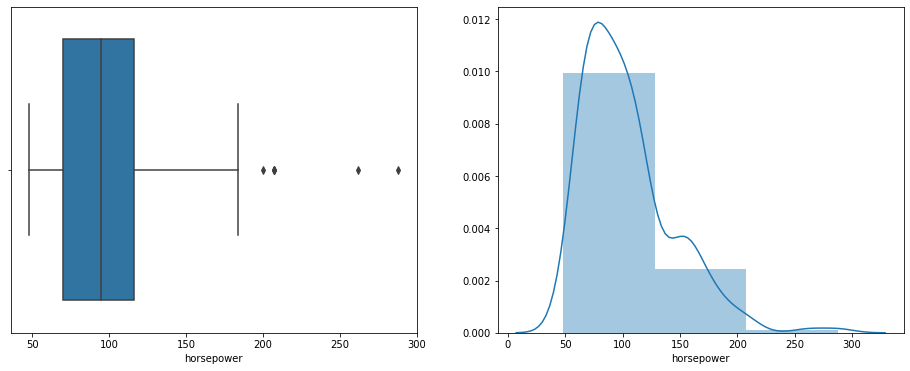

In [72]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric.loc[:,'horsepower'],ax=ax[0])
sns.distplot(data_numeric.loc[:,'horsepower'],bins=3,ax=ax[1])

plt.show()

### this also somewhat high skewed

In [73]:
data_numeric['horsepower'].describe()["75%"]-1.5*(data_numeric['horsepower'].describe()["25%"]-data_numeric['horsepower'].describe()["75%"])

185.0

In [74]:
data_cat[data_numeric['horsepower']>185]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
49,0,jaguar xk,gas,std,two,sedan,rwd,front,ohcv,twelve,mpfi
105,3,nissan kicks,gas,turbo,two,hatchback,rwd,front,ohcv,six,mpfi
126,3,porcshce panamera,gas,std,two,hardtop,rwd,rear,ohcf,six,mpfi
127,3,porsche cayenne,gas,std,two,hardtop,rwd,rear,ohcf,six,mpfi
128,3,porsche boxter,gas,std,two,convertible,rwd,rear,ohcf,six,mpfi
129,1,porsche cayenne,gas,std,two,hatchback,rwd,front,dohcv,eight,mpfi


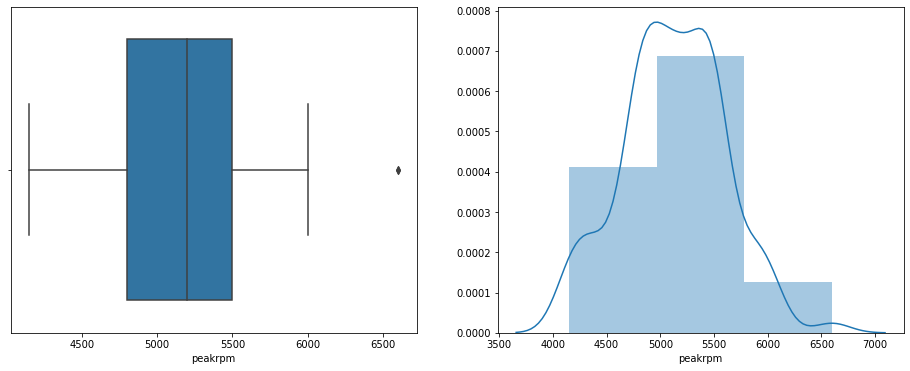

In [75]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric.loc[:,'peakrpm'],ax=ax[0])
sns.distplot(data_numeric.loc[:,'peakrpm'],bins=3,ax=ax[1])

plt.show()

In [76]:
data_cat[data_numeric['peakrpm']>6500]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
165,1,toyota celica gt liftback,gas,std,two,sedan,rwd,front,dohc,four,mpfi
166,1,toyota corolla tercel,gas,std,two,hatchback,rwd,front,dohc,four,mpfi


In [77]:
data[(data['price']==18280.00)|(data['price']==41315.00)]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brandName
16,0,bmw x5,gas,std,two,sedan,rwd,front,103.5,193.8,...,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0,bmw
65,0,mazda glc,gas,std,four,sedan,rwd,front,104.9,175.0,...,mpfi,3.76,3.16,8.0,120,5000,19,27,18280.0,mazda


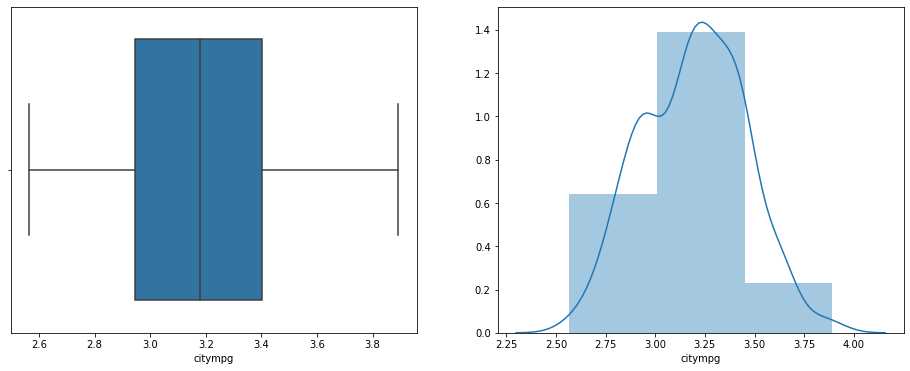

In [78]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(np.log(data_numeric.loc[:,'citympg']),ax=ax[0])
sns.distplot(np.log(data_numeric.loc[:,'citympg']),bins=3,ax=ax[1])

plt.show()

### log of citmpg remove outliers and is more normal

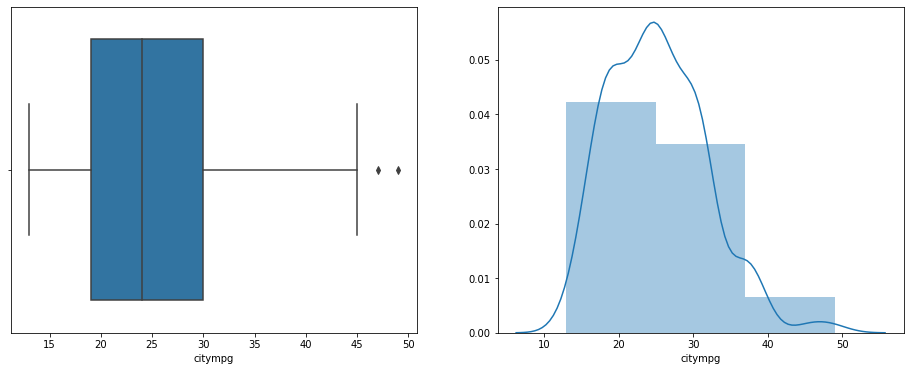

In [79]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric.loc[:,'citympg'],ax=ax[0])
sns.distplot(data_numeric.loc[:,'citympg'],bins=3,ax=ax[1])

plt.show()

In [80]:
data_cat[data_numeric['citympg']>45]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
18,2,chevrolet impala,gas,std,two,hatchback,fwd,front,l,three,2bbl
30,2,honda civic,gas,std,two,hatchback,fwd,front,ohc,four,1bbl


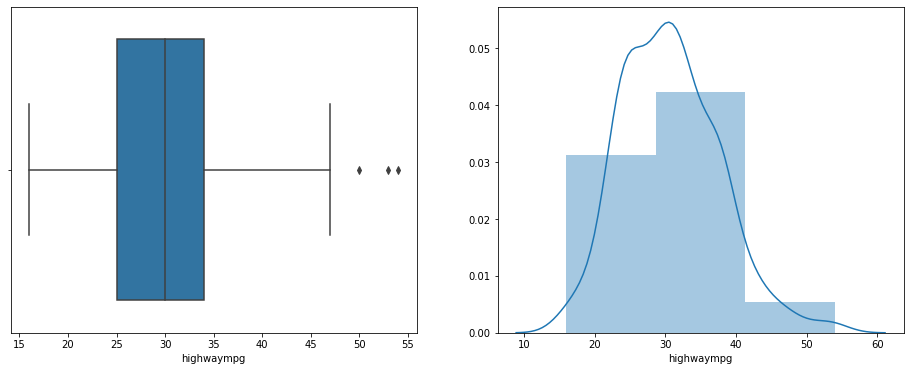

In [81]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric.loc[:,'highwaympg'],ax=ax[0])
sns.distplot(data_numeric.loc[:,'highwaympg'],bins=3,ax=ax[1])

plt.show()

In [82]:
data_cat[data_numeric['highwaympg']>47]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
18,2,chevrolet impala,gas,std,two,hatchback,fwd,front,l,three,2bbl
30,2,honda civic,gas,std,two,hatchback,fwd,front,ohc,four,1bbl
90,1,nissan gt-r,diesel,std,two,sedan,fwd,front,ohc,four,idi


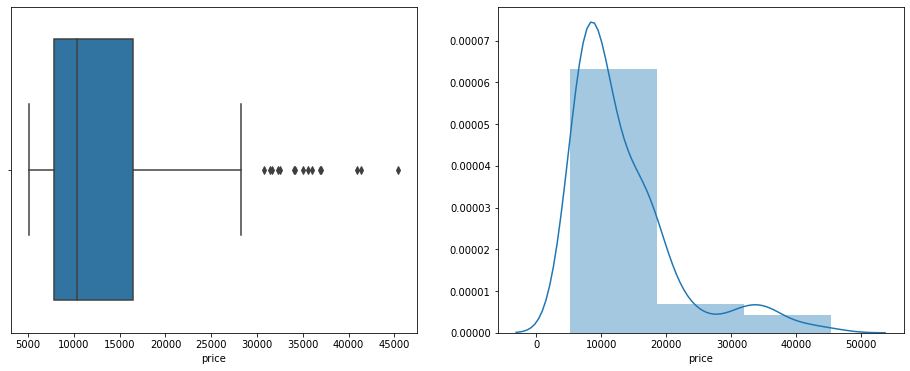

In [83]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric.loc[:,'price'],ax=ax[0])
sns.distplot(data_numeric.loc[:,'price'],bins=3,ax=ax[1])

plt.show()

In [93]:
data[data_numeric.price>29500].sort_values('price')

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brandName
67,-1,buick electra 225 custom,diesel,turbo,four,sedan,rwd,front,110.0,190.9,70.3,56.5,3515,ohc,five,183,idi,3.58,3.64,21.5,123,4350,22,25,25552.0,buick
69,0,buick century,diesel,turbo,two,hardtop,rwd,front,106.7,187.5,70.3,54.9,3495,ohc,five,183,idi,3.58,3.64,21.5,123,4350,22,25,28176.0,buick
68,-1,buick century luxus (sw),diesel,turbo,four,wagon,rwd,front,110.0,190.9,70.3,58.7,3750,ohc,five,183,idi,3.58,3.64,21.5,123,4350,22,25,28248.0,buick
15,0,bmw x4,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3230,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760.0,bmw
129,1,porsche cayenne,gas,std,two,hatchback,rwd,front,98.4,175.7,72.3,50.5,3366,dohcv,eight,203,mpfi,3.94,3.11,10.0,288,5750,17,28,31400.5,volkswagen
70,-1,buick skyhawk,diesel,turbo,four,sedan,rwd,front,115.6,202.6,71.7,56.3,3770,ohc,five,183,idi,3.58,3.64,21.5,123,4350,22,25,31600.0,buick
47,0,jaguar xj,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,52.8,4066,dohc,six,258,mpfi,3.63,4.17,8.1,176,4750,15,19,32250.0,jaguar
126,3,porcshce panamera,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.90,9.5,207,5900,17,25,32528.0,volkswagen
127,3,porsche cayenne,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.90,9.5,207,5900,17,25,34028.0,volkswagen
71,-1,buick opel isuzu deluxe,gas,std,four,sedan,rwd,front,115.6,202.6,71.7,56.5,3740,ohcv,eight,234,mpfi,3.46,3.10,8.3,155,4750,16,18,34184.0,buick


In [95]:
data.iloc[65,:]


symboling           0        
CarName             mazda glc
fueltype            gas      
aspiration          std      
doornumber          four     
carbody             sedan    
drivewheel          rwd      
enginelocation      front    
wheelbase           104.9    
carlength           175      
carwidth            66.1     
carheight           54.4     
curbweight          2670     
enginetype          ohc      
cylindernumber      four     
enginesize          140      
fuelsystem          mpfi     
boreratio           3.76     
stroke              3.16     
compressionratio    8        
horsepower          120      
peakrpm             5000     
citympg             19       
highwaympg          27       
price               18280    
brandName           mazda    
Name: 65, dtype: object

### price is skewed. will check transformation at later stages

In [85]:
data[(data['price']==18280.00)|(data['price']==15040.00)|(data['price']==34184.00)|((data['price']==45400.00)|(data['price']==41315.00))]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brandName
16,0,bmw x5,gas,std,two,sedan,rwd,front,103.5,193.8,...,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0,bmw
65,0,mazda glc,gas,std,four,sedan,rwd,front,104.9,175.0,...,mpfi,3.76,3.16,8.0,120,5000,19,27,18280.0,mazda
71,-1,buick opel isuzu deluxe,gas,std,four,sedan,rwd,front,115.6,202.6,...,mpfi,3.46,3.10,8.3,155,4750,16,18,34184.0,buick
74,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,112.0,199.2,...,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0,buick
134,3,saab 99le,gas,std,two,hatchback,fwd,front,99.1,186.6,...,mpfi,2.54,2.07,9.3,110,5250,21,28,15040.0,saab


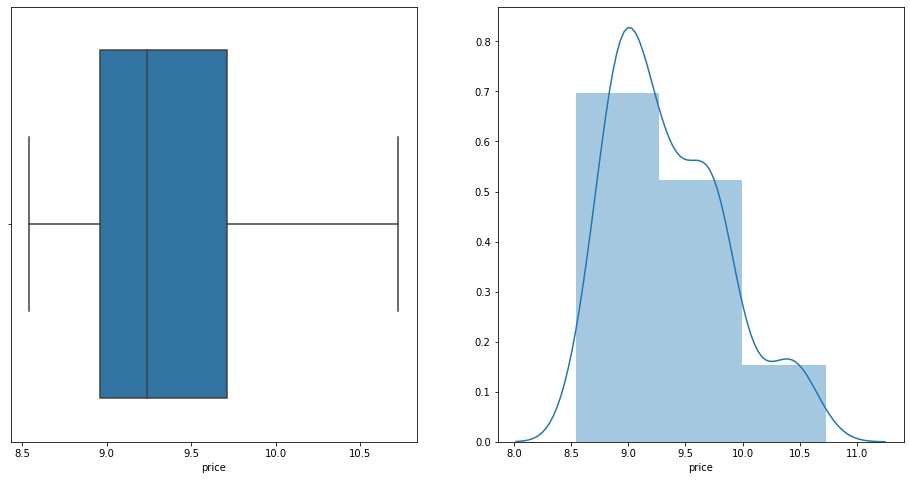

In [86]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 8))
sns.boxplot(np.log(data_numeric.loc[:,'price']),ax=ax[0])
sns.distplot(np.log(data_numeric.loc[:,'price']),bins=3,ax=ax[1])

plt.show()

## cluster analysis in R with gower's distance. for only cluster analysis i will transform varaibles

In [88]:
data.iloc[65,]

symboling           0        
CarName             mazda glc
fueltype            gas      
aspiration          std      
doornumber          four     
carbody             sedan    
drivewheel          rwd      
enginelocation      front    
wheelbase           104.9    
carlength           175      
carwidth            66.1     
carheight           54.4     
curbweight          2670     
enginetype          ohc      
cylindernumber      four     
enginesize          140      
fuelsystem          mpfi     
boreratio           3.76     
stroke              3.16     
compressionratio    8        
horsepower          120      
peakrpm             5000     
citympg             19       
highwaympg          27       
price               18280    
brandName           mazda    
Name: 65, dtype: object